In [66]:
data_file = "/Users/francopallitto/Documents/DS_projects/nispera/data/processed/final_data/normal_operation.csv"
df = pd.read_csv(data_file)
df

,Unnamed: 0,datetime,environment_air_temperature_avg,environment_wind_direction_absolute_avg,environment_wind_speed_avg,grid_power_active_avg,nacelle_direction_avg,rotor_blades_pitch_angle_avg,rotor_rotation_speed_avg,datagroup,ID,problem_class
0,0,2021-01-01T00:00:00,21.1,350.085840,8.400917,1839.433052,353.022220,-1.655556,11.226471,WTG06,ID19,Normal operation
1,1,2021-01-01T00:10:00,21.3,346.317092,7.626214,1427.952098,348.300000,-1.953846,10.448387,WTG06,ID19,Normal operation
2,2,2021-01-01T00:20:00,21.0,350.149572,8.281000,1854.768911,NaN,-1.791667,11.265385,WTG06,ID19,Normal operation
3,3,2021-01-01T00:30:00,21.0,348.635042,9.360377,2667.209249,347.737499,-1.844186,12.175000,WTG06,ID19,Normal operation
4,4,2021-01-01T00:40:00,21.0,346.470689,10.338318,3268.644916,346.533335,-0.553750,12.250000,WTG06,ID19,Normal operation
...,...,...,...,...,...,...,...,...,...,...,...,...
52699,52699,2022-01-01T23:10:00,25.0,303.625862,11.265179,1731.272267,306.159994,8.819820,10.911765,WTG06,ID19,Normal operation
52700,52700,2022-01-01T23:20:00,25.0,303.713445,10.926549,1731.147055,NaN,8.125664,10.961702,WTG06,ID19,Normal operation
52701,52701,2022-01-01T23:30:00,24.1,301.383051,12.261404,1791.684035,299.699997,10.091379,10.940385,WTG06,ID19,Normal operation
52702,52702,2022-01-01T23:40:00,24.0,298.027967,13.392920,1861.715963,298.752941,11.570270,11.032710,WTG06,ID19,Normal operation


In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from pyod.models.copod import COPOD

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 368928 entries, 0 to 368927
Data columns (total 12 columns):
 #   Column                                   Non-Null Count   Dtype  
---  ------                                   --------------   -----  
 0   Unnamed: 0                               368928 non-null  int64  
 1   datetime                                 368928 non-null  object 
 2   environment_air_temperature_avg          368928 non-null  float64
 3   environment_wind_direction_absolute_avg  240677 non-null  float64
 4   environment_wind_speed_avg               368928 non-null  float64
 5   grid_power_active_avg                    368928 non-null  float64
 6   nacelle_direction_avg                    365621 non-null  float64
 7   rotor_blades_pitch_angle_avg             313269 non-null  float64
 8   rotor_rotation_speed_avg                 365766 non-null  float64
 9   datagroup                                368928 non-null  object 
 10  ID                              

In [67]:
feature_names = ['environment_air_temperature_avg',
       'environment_wind_speed_avg',
       'grid_power_active_avg',
       'rotor_blades_pitch_angle_avg', 'rotor_rotation_speed_avg']

In [68]:
features = df[feature_names]

In [69]:
features = features.dropna()

In [70]:
features_df = features

In [71]:
scalar = StandardScaler()

In [72]:
features = scalar.fit_transform(features)


In [73]:
features

array([[ 0.72843077, -0.22003859, -0.2195754 , -0.56232862,  0.35976668],
       [ 0.75948027, -0.43303439, -0.52684592, -0.61039124,  0.07378179],
       [ 0.71290602, -0.25300848, -0.20812345, -0.58425977,  0.37406954],
       ...,
       [ 1.19417329,  0.84135713, -0.25523164,  1.33041806,  0.25461568],
       [ 1.17864854,  1.15245452, -0.20293579,  1.56870711,  0.28855   ],
       [ 1.14759904,  1.39855565, -0.20364636,  1.82514823,  0.28737881]])

In [82]:
outlier_proportion = 0.1

In [83]:
model = COPOD(contamination=outlier_proportion)
model.fit(features)
# Initialize and train anomaly scorer
    #anomaly_scorer = MinMaxScaler(feature_range=(0, 1))
anomaly_scorer = RobustScaler(with_centering=False, unit_variance=True)
train_anomaly_scores = model.decision_function(features).reshape(-1, 1)
train_anomaly_scores = anomaly_scorer.fit_transform(train_anomaly_scores)

In [84]:
train_anomaly_scores.shape

(40298, 1)

In [85]:
features.shape

(40298, 5)

In [86]:
import plotly.express as px

In [97]:
features_df["train_anomaly_scores"] = train_anomaly_scores > 3.5

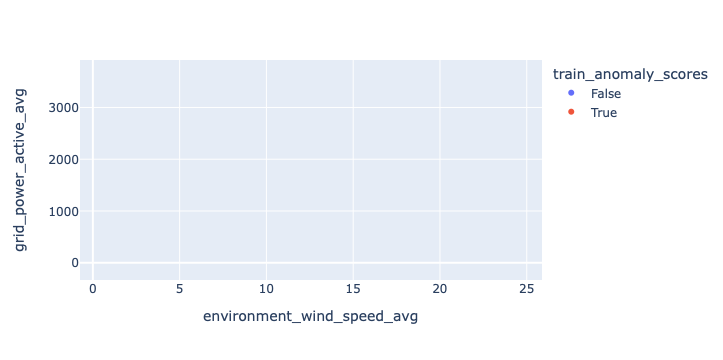

In [98]:
fig = px.scatter(features_df, x="environment_wind_speed_avg", y="grid_power_active_avg", color = "train_anomaly_scores")
fig.show()